In [21]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import powerlaw
from collections import Counter
warnings.filterwarnings('ignore')

In [234]:
g = nx.Graph()

# Read data from CSV file
with open('weighted_graph.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    for row in reader:
        source, target, weight = row
        g.add_edge(source, target, weight=float(weight))

In [5]:
df = pd.read_csv("artisti_df.csv")
df.head()

0           1           2     3             4              name
0         rock  electronic   indie pop  trap     brazilian   Karylin Granger
1  alternative         USA     Hip-Hop   rap     brazilian    Daven Peniello
2  alternative    american   indie pop   rap  experimental     Webb Goligher
3        indie     hip hop  indie rock   rnb          folk  Margaux Slograve
4          pop         USA     Hip-Hop   rnb  instrumental    Saleem Winning

- Quali generi musicali tendono ad avere artisti più centrali nella rete? Esiste una correlazione tra il genere musicale e le misure di centralità come degree, betweenness e closeness centrality?

- Quali tag specifici sono più efficaci nel creare collegamenti tra artisti? Esistono tag che tendono a formare più archi rispetto ad altri?


Frequency for all df

In [76]:
# All

# Aggregate all genres into a single list
all_genres = df.iloc[:, 0:5].values.flatten().tolist()

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

print(genre_counts)

Counter({'pop': 2120, 'electronic': 1950, 'seen live': 1870, 'indie': 1860, 'rock': 1767, 'Hip-Hop': 1767, 'rap': 1658, 'female vocalists': 1481, 'alternative': 1355, 'hip hop': 1199, 'indie rock': 1117, 'indie pop': 1107, 'rnb': 1078, 'singer-songwriter': 1045, 'folk': 1005, 'british': 961, 'trap': 934, 'brazilian': 920, 'instrumental': 907, 'dance': 907, 'USA': 881, 'american': 881, 'experimental': 874, 'metal': 863, 'electronica': 746, 'soul': 500, 'jazz': 326, 'Lo-Fi': 299, 'japanese': 295, 'alternative rock': 289, 'House': 272, 'Korean': 259, 'ambient': 251, '80s': 239, 'funk': 236, 'Soundtrack': 233, 'k-pop': 229, 'classic rock': 224, 'punk': 202, 'latin': 196, 'emo': 182, 'dream pop': 174, 'hardcore': 164, 'shoegaze': 160, 'country': 154, 'hard rock': 152, 'brasil': 144, 'psychedelic': 142, 'french': 142, 'acoustic': 138, 'Kpop': 137, 'brazil': 136, 'chillout': 131, 'post-punk': 128, 'new wave': 127, 'cloud rap': 127, 'post-hardcore': 126, 'synthpop': 124, 'Canadian': 117, '70s'

In [77]:
top_genres = genre_counts.most_common(10)
print(top_genres)

[('pop', 2120), ('electronic', 1950), ('seen live', 1870), ('indie', 1860), ('rock', 1767), ('Hip-Hop', 1767), ('rap', 1658), ('female vocalists', 1481), ('alternative', 1355), ('hip hop', 1199)]


In [78]:
genres, counts = zip(*top_genres)

Based on degree centrality

In [79]:
# degree centrality

degrees = dict(g.degree())
ranks_degree = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks_degree[0:10]

[('Pi’erre Bourne', 798),
 ('Rico Nasty', 798),
 ('Rich The Kid', 798),
 ('Monaleo', 798),
 ('Baby Keem', 797),
 ('A BOOGIE WIT DA HOODIE', 797),
 ('Audrey Nuna', 766),
 ('NGC Daddy', 749),
 ('Nicki Minaj', 747),
 ('Black Eyed Peas', 747)]

In [80]:
dftop_degree_centrality = df.loc[df['name'].isin([e[0] for e in ranks_degree[0:10]])]
dftop_degree_centrality

0          1          2          3          4  \
2057  Hip-Hop        rap        rnb        pop    hip hop   
2084      rap    Hip-Hop       trap  seen live    hip hop   
2125  Hip-Hop        pop        rnb        rap    hip hop   
2288      rap    Hip-Hop    hip hop       trap  seen live   
2605     trap  seen live    Hip-Hop    hip hop        rap   
2898     trap        rap    Hip-Hop    hip hop  seen live   
3359  Hip-Hop        rap       trap    hip hop  seen live   
5351      rap    Hip-Hop  seen live    hip hop       trap   
5771  Hip-Hop        rap       trap    hip hop        pop   
8191     trap        rap    Hip-Hop    hip hop  brazilian   

                        name  
2057             Nicki Minaj  
2084               Baby Keem  
2125         Black Eyed Peas  
2288  A BOOGIE WIT DA HOODIE  
2605          Pi’erre Bourne  
2898              Rico Nasty  
3359            Rich The Kid  
5351                 Monaleo  
5771             Audrey Nuna  
8191               NGC Daddy

In [110]:
# Aggregate all genres into a single list
all_genres = dftop_degree_centrality.iloc[:, 0:5].values.flatten().tolist()

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

print(genre_counts)

Counter({'Hip-Hop': 10, 'rap': 10, 'hip hop': 10, 'trap': 8, 'seen live': 6, 'pop': 3, 'rnb': 2, 'brazilian': 1})


In [112]:
top_genres = genre_counts.most_common(10)
top_genres

[('Hip-Hop', 10),
 ('rap', 10),
 ('hip hop', 10),
 ('trap', 8),
 ('seen live', 6),
 ('pop', 3),
 ('rnb', 2),
 ('brazilian', 1)]

In [96]:
genres_degree, counts_degree = zip(*top_genres)

Based on closeness centrality

In [13]:
# closeness

closeness = nx.closeness_centrality(g)
ranks_closeness = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks_closeness[0:10]

[('Róisín Murphy', 0.362922792902116),
 ('Electrelane', 0.361832655204106),
 ('Chairlift', 0.3617001594498843),
 ('Quinn XCII', 0.3611183290467916),
 ('UPSAHL', 0.36109192668312523),
 ('Saint Etienne', 0.36109192668312523),
 ('Azealia Banks', 0.36102593766143604),
 ('Charlotte Lawrence', 0.36052520820559497),
 ('SAIN', 0.3604462726031561),
 ('Tkay Maidza', 0.3602359465505795)]

In [84]:
dftop_closeness_centrality = df.loc[df['name'].isin([e[0] for e in ranks_closeness[0:10]])]
dftop_closeness_centrality 

0                 1                 2                 3  \
2367     Hip-Hop               rap        electronic  female vocalists   
3906         pop             indie         indie pop  female vocalists   
4160  electronic               pop           Hip-Hop         indie pop   
4354     Hip-Hop               rap         seen live               pop   
4575         pop         indie pop  female vocalists        electronic   
4953  electronic               pop         indie pop  female vocalists   
5044  electronic         indie pop             indie  female vocalists   
5279  electronic  female vocalists             dance               pop   
5768     Hip-Hop        electronic         seen live              rock   
8935       indie         seen live        indie rock  female vocalists   

               4                name  
2367   seen live       Azealia Banks  
3906  electronic              UPSAHL  
4160   seen live          Quinn XCII  
4354     hip hop         Tkay Maidza  
4575   seen live  Charlotte Lawrence  
4953       indie       Saint Etienne  
5044   seen live           Chairlift  
5279   seen live       Róisín Murphy  
5768         rap                SAIN  
8935  electronic         Electrelane

In [85]:
# Aggregate all genres into a single list
all_genres = dftop_closeness_centrality.iloc[:, 0:5].values.flatten().tolist()

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

print(genre_counts)

Counter({'electronic': 9, 'seen live': 8, 'female vocalists': 7, 'pop': 6, 'indie pop': 5, 'Hip-Hop': 4, 'indie': 4, 'rap': 3, 'hip hop': 1, 'dance': 1, 'rock': 1, 'indie rock': 1})


In [86]:
top_genres = genre_counts.most_common(10)
top_genres

[('electronic', 9),
 ('seen live', 8),
 ('female vocalists', 7),
 ('pop', 6),
 ('indie pop', 5),
 ('Hip-Hop', 4),
 ('indie', 4),
 ('rap', 3),
 ('hip hop', 1),
 ('dance', 1)]

In [87]:
genres_closeness, counts_closeness = zip(*top_genres)

Based on betwenness

In [15]:
# betwenness

betweenness = nx.betweenness_centrality(g)
ranks_betwenness= [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks_betwenness[0:10]

[('Sanguisugabogg', 0.011733615059926148),
 ('Juno', 0.010893008328839672),
 ('Devita', 0.009898137232422508),
 ('Clint Mansell', 0.009711097844004061),
 ('AOA', 0.009640602824760727),
 ('okvsho', 0.008789569990050717),
 ('Mike Shinoda', 0.007992121257433146),
 ('The Album Leaf', 0.007224073236787874),
 ('Call Me Karizma', 0.006615434165811591),
 ('Bruce Dickinson', 0.005921243856266095)]

In [88]:
dftop_betweenness_centrality = df.loc[df['name'].isin([e[0] for e in ranks_betwenness[0:10]])]
dftop_betweenness_centrality 


0                   1                 2                 3  \
2857        k-pop              Korean        electronic               pop   
4909      Hip-Hop                 rap       alternative  alternative rock   
5177      Hip-Hop                rock  alternative rock               rap   
5462      Hip-Hop           seen live             indie        indie rock   
6164   Soundtrack        instrumental           ambient        electronic   
7167         jazz          electronic           Hip-Hop      instrumental   
8487  heavy metal               metal         hard rock           british   
8977  death metal  Brutal Death Metal             metal         seen live   
9037          pop              Korean             k-pop           Hip-Hop   
9047    post-rock             ambient      instrumental        electronic   

                     4             name  
2857  female vocalists              AOA  
4909         seen live  Call Me Karizma  
5177       alternative     Mike Shinoda  
5462               rap             Juno  
6164         Classical    Clint Mansell  
7167           ambient           okvsho  
8487              rock  Bruce Dickinson  
8977               USA   Sanguisugabogg  
9037               rnb           Devita  
9047             indie   The Album Leaf

In [89]:
# Aggregate all genres into a single list
all_genres = dftop_betweenness_centrality.iloc[:, 0:5].values.flatten().tolist()

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

print(genre_counts)

Counter({'Hip-Hop': 5, 'electronic': 4, 'rap': 3, 'seen live': 3, 'instrumental': 3, 'ambient': 3, 'k-pop': 2, 'Korean': 2, 'pop': 2, 'alternative': 2, 'alternative rock': 2, 'rock': 2, 'indie': 2, 'metal': 2, 'female vocalists': 1, 'indie rock': 1, 'Soundtrack': 1, 'Classical': 1, 'jazz': 1, 'heavy metal': 1, 'hard rock': 1, 'british': 1, 'death metal': 1, 'Brutal Death Metal': 1, 'USA': 1, 'rnb': 1, 'post-rock': 1})


In [91]:
top_genres = genre_counts.most_common(10)
top_genres

[('Hip-Hop', 5),
 ('electronic', 4),
 ('rap', 3),
 ('seen live', 3),
 ('instrumental', 3),
 ('ambient', 3),
 ('k-pop', 2),
 ('Korean', 2),
 ('pop', 2),
 ('alternative', 2)]

In [92]:
genres_betwenness, counts_betwenness = zip(*top_genres)

Plot to make the comparison

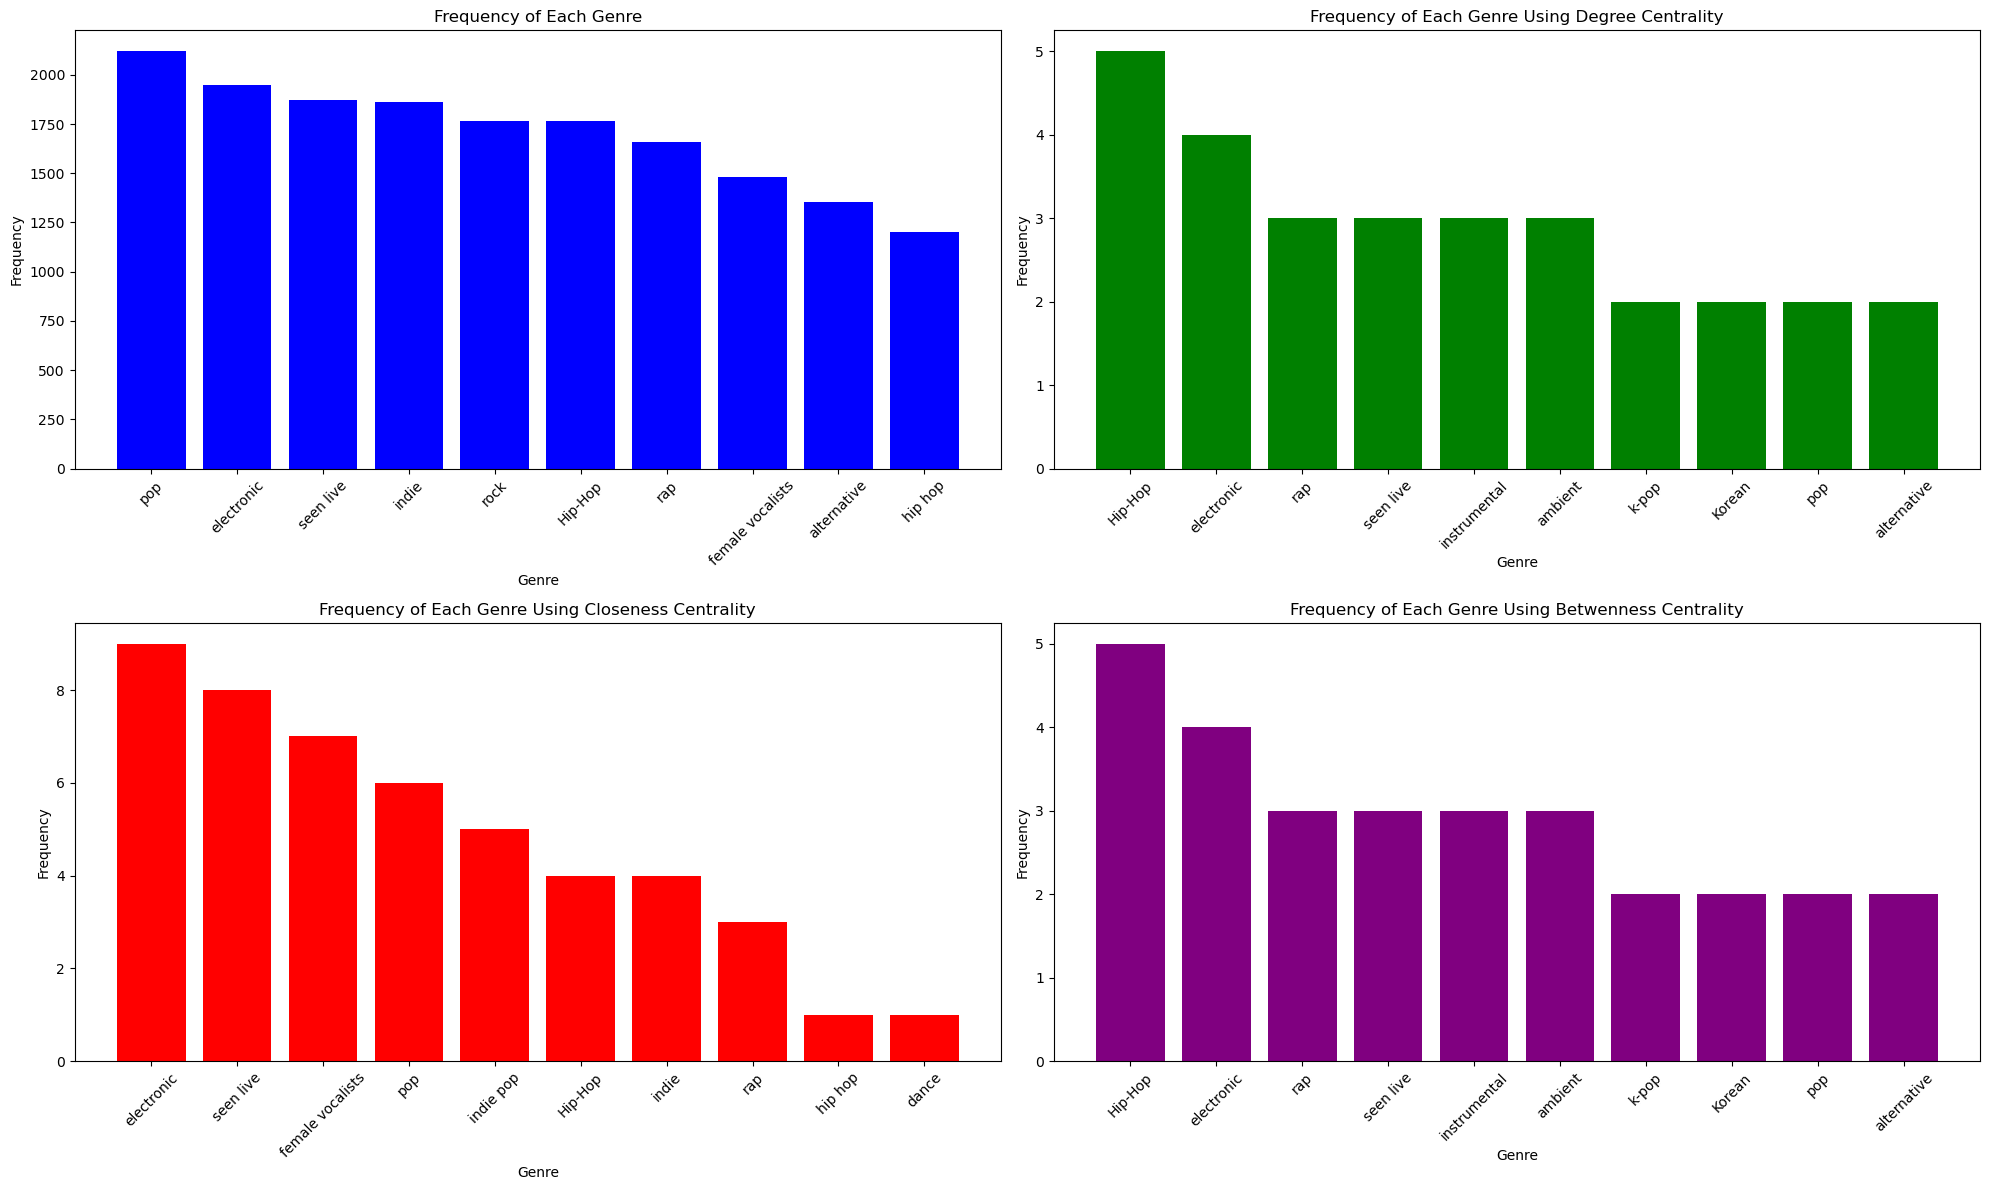

In [98]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot the first bar chart
ax1.bar(genres, counts, color='blue')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Each Genre')
ax1.set_xticks(range(len(genres)))
ax1.set_xticklabels(genres, rotation=45)

# Plot the second bar chart
ax2.bar(genres_degree, counts_degree, color='green')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of Each Genre Using Degree Centrality')
ax2.set_xticks(range(len(genres_degree)))
ax2.set_xticklabels(genres_degree, rotation=45)

# Plot the third bar chart
ax3.bar(genres_closeness, counts_closeness, color='red')
ax3.set_xlabel('Genre')
ax3.set_ylabel('Frequency')
ax3.set_title('Frequency of Each Genre Using Closeness Centrality')
ax3.set_xticks(range(len(genres_closeness)))
ax3.set_xticklabels(genres_closeness, rotation=45)

# Plot the fourth bar chart
ax4.bar(genres_betwenness, counts_betwenness, color='purple')
ax4.set_xlabel('Genre')
ax4.set_ylabel('Frequency')
ax4.set_title('Frequency of Each Genre Using Betwenness Centrality')
ax4.set_xticks(range(len(genres_betwenness)))
ax4.set_xticklabels(genres_betwenness, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

- Gli artisti con una maggiore diversità di tag (ovvero che appartengono a più generi o stili) tendono ad essere più centrali nella rete?
- Gli artisti con una maggiore diversità di tag tendono a occupare posizioni più strategiche nella rete? Esistono artisti con molti tag che fungono da hub?

In [132]:
s = set()

for e in df.iterrows():
    for i in range(5):
        s.add(e[1][i])

In [133]:
print(f"There are {len(s)} distinct genres")

There are 2797 distinct genres


In [156]:
# Create a dictionary with macro genres 

genre_mapping = {
    "Classical": [
        "classical", "classicism", "20th Century Classical", "orchestral", "harpsichord", 
        "movie score composers", "pianista", "composer", "symphonic"
    ],
    "Rock": [
        "Rock","Rock and Roll", "alt-rock", "modern rock", "new beat", "hardcore punk",
        "glam metal", "thrash metal", "space rock", "riot grrrl", "classic rock",
        "grungegaze", "stoner rock", "alternative metal", "punk", "rock chileno",
        "surf rock", "post-rock"
    ],
    "Hip-Hop/Rap": [
        "Hip-Hop","hip hop","german rap", "underground rap", "west coast", "east coast rap", "UK hip-hop",
        "trap latino", "Southern Hip Hop", "NYC rap", "gangsta rap", "alternative rap"
    ],
    "Electronic": [
        "Electronic","vocal trance", "euro-house", "melodic dubstep", "dark techno", "electropop",
        "minimalist", "minimal synth", "electro country", "future bass", "dubstep",
        "electro swing", "idm", "techhouse", "synthwave"
    ],
    "Pop": [
        "Pop","retro pop", "dance pop", "pop punk", "teen pop", "bubblegum pop", "synth pop",
        "indie-pop", "alt-pop", "k-pop"
    ],
    "Jazz": [
        "Jazz","soul jazz records", "avant-garde jazz", "jazz fusion", "vocal jazz", 
        "jazz rap", "jazz guitar", "jazz instrumental"
    ],
    "Metal": [
        "Metal","swedish death metal", "true black metal", "avant-garde metal", "metalcore",
        "progressive metal", "blackened deathcore", "death industrial", "doom metal",
        "thrash metal", "power metal", "viking metal", "nu metal"
    ],
    "Country": [
        "Country","classic country", "country-folk", "outlaw country", "country rock", "bro-country",
        "country-pop", "alt-country"
    ],
    "World": [
        "samba", "qawwali", "tropipop", "reggaeton", "bossa nova", "latin pop", "afrobeat",
        "bollywood", "klezmer", "salsa", "tango", "flamenco", "cumbia"
    ],
    "Other": [
        "8-bit", "nerdcore", "chiptunes", "video game music", "anime", "movie", "soundtrack"
    ]
}

In [172]:
genre_to_macro = {genre.lower(): macro for macro, genres in genre_mapping.items() for genre in genres}

In [173]:
genre_to_macro

{'classical': 'Classical',
 'classicism': 'Classical',
 '20th century classical': 'Classical',
 'orchestral': 'Classical',
 'harpsichord': 'Classical',
 'movie score composers': 'Classical',
 'pianista': 'Classical',
 'composer': 'Classical',
 'symphonic': 'Classical',
 'rock': 'Rock',
 'rock and roll': 'Rock',
 'alt-rock': 'Rock',
 'modern rock': 'Rock',
 'new beat': 'Rock',
 'hardcore punk': 'Rock',
 'glam metal': 'Rock',
 'thrash metal': 'Metal',
 'space rock': 'Rock',
 'riot grrrl': 'Rock',
 'classic rock': 'Rock',
 'grungegaze': 'Rock',
 'stoner rock': 'Rock',
 'alternative metal': 'Rock',
 'punk': 'Rock',
 'rock chileno': 'Rock',
 'surf rock': 'Rock',
 'post-rock': 'Rock',
 'hip-hop': 'Hip-Hop/Rap',
 'hip hop': 'Hip-Hop/Rap',
 'german rap': 'Hip-Hop/Rap',
 'underground rap': 'Hip-Hop/Rap',
 'west coast': 'Hip-Hop/Rap',
 'east coast rap': 'Hip-Hop/Rap',
 'uk hip-hop': 'Hip-Hop/Rap',
 'trap latino': 'Hip-Hop/Rap',
 'southern hip hop': 'Hip-Hop/Rap',
 'nyc rap': 'Hip-Hop/Rap',
 'gan

In [177]:
# create a dictionary: keys --> names, values --> genres (using genre_to_macro dictionary)

dizionario = {}
for _, row in df.iterrows():
    name = row[5]
    dizionario[name] = set()
    for i in range(5):
        current = row[i].lower()
        dizionario[name].add(genre_to_macro.get(current,current))

    
    

In [195]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0

for key,items in dizionario.items():
    if len(items) == 1:
        count1 += 1
    if len(items) == 2:
        count2 += 1
    if len(items) == 3:
        count3 += 1
    if len(items) == 4:
        count4 += 1
    if len(items) == 5:
        count5 += 1
    
print(f"{count1} artists have 1 genre")
print(f"{count2} artists have 2 genres")
print(f"{count3} artists have 3 genres")
print(f"{count4} artists have 4 genres")
print(f"{count5} artists have 5 genres")

0 artists have 1 genre
9 artists have 2 genres
122 artists have 3 genres
1612 artists have 4 genres
8769 artists have 5 genres


In [198]:
deg = [e[0] for e in ranks_degree[0:10]]
clos = [e[0] for e in ranks_closeness[0:10]]
betw = [e[0] for e in ranks_betwenness[0:10]]

In [226]:
print("N. genres: 5\n")
for key,items in dizionario.items():
    if len(items) == 5:
        if key in clos:
            print(f"{key} in the top 10 for closeness centrality")

print("\n")
print("N. genres: 4\n")
for key,items in dizionario.items():
    if len(items) == 4:
        if key in clos:
            print(f"{key} in the top 10 for closeness centrality")

        

N. genres: 5

Azealia Banks in the top 10 for closeness centrality
UPSAHL in the top 10 for closeness centrality
Quinn XCII in the top 10 for closeness centrality
Charlotte Lawrence in the top 10 for closeness centrality
Saint Etienne in the top 10 for closeness centrality
Chairlift in the top 10 for closeness centrality
Róisín Murphy in the top 10 for closeness centrality
SAIN in the top 10 for closeness centrality
Electrelane in the top 10 for closeness centrality


N. genres: 4

Tkay Maidza in the top 10 for closeness centrality


In [228]:
print("N. genres: 5\n")
for key,items in dizionario.items():
    if len(items) == 5:
        if key in deg:
            print(f"{key} in the top 10 for degree centrality")

print("\n")
print("N. genres: 4\n")
for key,items in dizionario.items():
    if len(items) == 4:
        if key in deg:
            print(f"{key} in the top 10 for degree centrality")

N. genres: 5



N. genres: 4

Nicki Minaj in the top 10 for degree centrality
Baby Keem in the top 10 for degree centrality
Black Eyed Peas in the top 10 for degree centrality
A BOOGIE WIT DA HOODIE in the top 10 for degree centrality
Pi’erre Bourne in the top 10 for degree centrality
Rico Nasty in the top 10 for degree centrality
Rich The Kid in the top 10 for degree centrality
Monaleo in the top 10 for degree centrality
Audrey Nuna in the top 10 for degree centrality
NGC Daddy in the top 10 for degree centrality


In [229]:
print("N. genres: 5\n")
for key,items in dizionario.items():
    if len(items) == 5:
        if key in betw:
            print(f"{key} in the top 10 for betweennes centrality")

print("\n")
print("N. genres: 4\n")
for key,items in dizionario.items():
    if len(items) == 4:
        if key in betw:
            print(f"{key} in the top 10 for betweennes centrality")

N. genres: 5

Call Me Karizma in the top 10 for betweennes centrality
Mike Shinoda in the top 10 for betweennes centrality
Juno in the top 10 for betweennes centrality
Clint Mansell in the top 10 for betweennes centrality
okvsho in the top 10 for betweennes centrality
Bruce Dickinson in the top 10 for betweennes centrality
Sanguisugabogg in the top 10 for betweennes centrality
The Album Leaf in the top 10 for betweennes centrality


N. genres: 4

AOA in the top 10 for betweennes centrality
Devita in the top 10 for betweennes centrality


- Gli artisti con una maggiore diversità di tag tendono a occupare posizioni più strategiche nella rete? Esistono artisti con molti tag che fungono da hub?

In [ ]:
deg = [e[0] for e in ranks_degree[0:10]]
clos = [e[0] for e in ranks_closeness[0:10]]
betw = [e[0] for e in ranks_betwenness[0:10]]

In [231]:
central_artists = set(deg + clos + betw)

In [232]:
print(central_artists)

{'NGC Daddy', 'Rich The Kid', 'Juno', 'The Album Leaf', 'Tkay Maidza', 'Audrey Nuna', 'Rico Nasty', 'okvsho', 'Róisín Murphy', 'Baby Keem', 'Devita', 'Charlotte Lawrence', 'Call Me Karizma', 'Clint Mansell', 'Mike Shinoda', 'Chairlift', 'UPSAHL', 'Pi’erre Bourne', 'AOA', 'Azealia Banks', 'Black Eyed Peas', 'Sanguisugabogg', 'Quinn XCII', 'Saint Etienne', 'A BOOGIE WIT DA HOODIE', 'Bruce Dickinson', 'Nicki Minaj', 'Monaleo', 'SAIN', 'Electrelane'}


In [236]:
# rimuovendoli tutti senza criterio (ma comunque i più centrali)
import copy

g1 = copy.deepcopy(g)

for e in central_artists:
    g1.remove_node(e)
    print(f"Rimosso nodo {e}, connected components: {nx.number_connected_components(g1)}")

Rimosso nodo NGC Daddy, connected components: 30
Rimosso nodo Rich The Kid, connected components: 30
Rimosso nodo Juno, connected components: 31
Rimosso nodo The Album Leaf, connected components: 31
Rimosso nodo Tkay Maidza, connected components: 31
Rimosso nodo Audrey Nuna, connected components: 31
Rimosso nodo Rico Nasty, connected components: 31
Rimosso nodo okvsho, connected components: 31
Rimosso nodo Róisín Murphy, connected components: 31
Rimosso nodo Baby Keem, connected components: 31
Rimosso nodo Devita, connected components: 31
Rimosso nodo Charlotte Lawrence, connected components: 31
Rimosso nodo Call Me Karizma, connected components: 31
Rimosso nodo Clint Mansell, connected components: 31
Rimosso nodo Mike Shinoda, connected components: 31
Rimosso nodo Chairlift, connected components: 31
Rimosso nodo UPSAHL, connected components: 31
Rimosso nodo Pi’erre Bourne, connected components: 31
Rimosso nodo AOA, connected components: 31
Rimosso nodo Azealia Banks, connected compone

In [238]:
# degree decrescente

g1 = copy.deepcopy(g)

for e in deg:
    g1.remove_node(e)
    print(f"Rimosso nodo {e}, connected components: {nx.number_connected_components(g1)}")

Rimosso nodo Pi’erre Bourne, connected components: 30
Rimosso nodo Rico Nasty, connected components: 30
Rimosso nodo Rich The Kid, connected components: 30
Rimosso nodo Monaleo, connected components: 30
Rimosso nodo Baby Keem, connected components: 30
Rimosso nodo A BOOGIE WIT DA HOODIE, connected components: 30
Rimosso nodo Audrey Nuna, connected components: 30
Rimosso nodo NGC Daddy, connected components: 30
Rimosso nodo Nicki Minaj, connected components: 30
Rimosso nodo Black Eyed Peas, connected components: 30


In [239]:
# closeness decrescente

g1 = copy.deepcopy(g)

for e in clos:
    g1.remove_node(e)
    print(f"Rimosso nodo {e}, connected components: {nx.number_connected_components(g1)}")

Rimosso nodo Róisín Murphy, connected components: 30
Rimosso nodo Electrelane, connected components: 30
Rimosso nodo Chairlift, connected components: 30
Rimosso nodo Quinn XCII, connected components: 30
Rimosso nodo UPSAHL, connected components: 30
Rimosso nodo Saint Etienne, connected components: 30
Rimosso nodo Azealia Banks, connected components: 30
Rimosso nodo Charlotte Lawrence, connected components: 30
Rimosso nodo SAIN, connected components: 30
Rimosso nodo Tkay Maidza, connected components: 30


In [240]:
# betwenness decrescente

g1 = copy.deepcopy(g)

for e in betw:
    g1.remove_node(e)
    print(f"Rimosso nodo {e}, connected components: {nx.number_connected_components(g1)}")

# si nota come Juno abbia incrementato pure in questo caso il numero delle componenti

Rimosso nodo Sanguisugabogg, connected components: 30
Rimosso nodo Juno, connected components: 31
Rimosso nodo Devita, connected components: 31
Rimosso nodo Clint Mansell, connected components: 31
Rimosso nodo AOA, connected components: 31
Rimosso nodo okvsho, connected components: 31
Rimosso nodo Mike Shinoda, connected components: 31
Rimosso nodo The Album Leaf, connected components: 31
Rimosso nodo Call Me Karizma, connected components: 31
Rimosso nodo Bruce Dickinson, connected components: 31


In [242]:
nx.degree(g,"Juno")

382

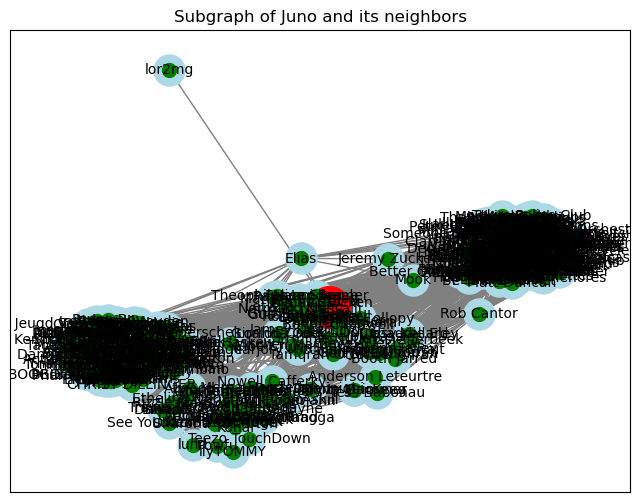

In [255]:
# Find neighbors of 'Juno'
neighbors = list(g.neighbors('Juno'))

# Subgraph (Juno and neighbors)
nodes_to_include = ['Juno'] + neighbors
subgraph = g.subgraph(nodes_to_include)

# Draw the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)

# Draw all nodes without labels
nx.draw_networkx_nodes(subgraph, pos, nodelist=subgraph.nodes, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges, edge_color='gray')

# Use different color
nx.draw_networkx_nodes(subgraph, pos, nodelist=['Juno'], node_color='red', node_size=900)
nx.draw_networkx_nodes(subgraph, pos, nodelist=neighbors, node_color='green', node_size=100)

# Draw labels only for 'Juno' and its neighbors
labels = {node: node for node in ['Juno'] + neighbors}
nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=10, font_color='black')

plt.title("Subgraph of Juno and its neighbors")
plt.show()

In [252]:
# node lor2mg has only a neighbor: Juno
neigh_lor2mg = nx.neighbors(g,"lor2mg")
for e in neigh_lor2mg:
    print(e)

Juno


In [256]:
g.degree("lor2mg")

1